In [6]:
%matplotlib inline

In [406]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv("autos.csv",encoding="latin-1")

In [835]:
import os
abs_path = os.getcwd()
abs_path

'/Users/aj/Desktop/DAUP-Project'

In [10]:
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [11]:
# df.loc[df["seller"] == "privat"].head(5)
df["vehicleType"].isnull().values.sum()

37869

In [12]:
# changing the vehicleType from NaN to Others
df["vehicleType"].fillna("Other", inplace=True)

In [13]:
# checking the no of vehicles that are of type others
[df["vehicleType"] == "Other"][0].value_counts()

False    333659
True      37869
Name: vehicleType, dtype: int64

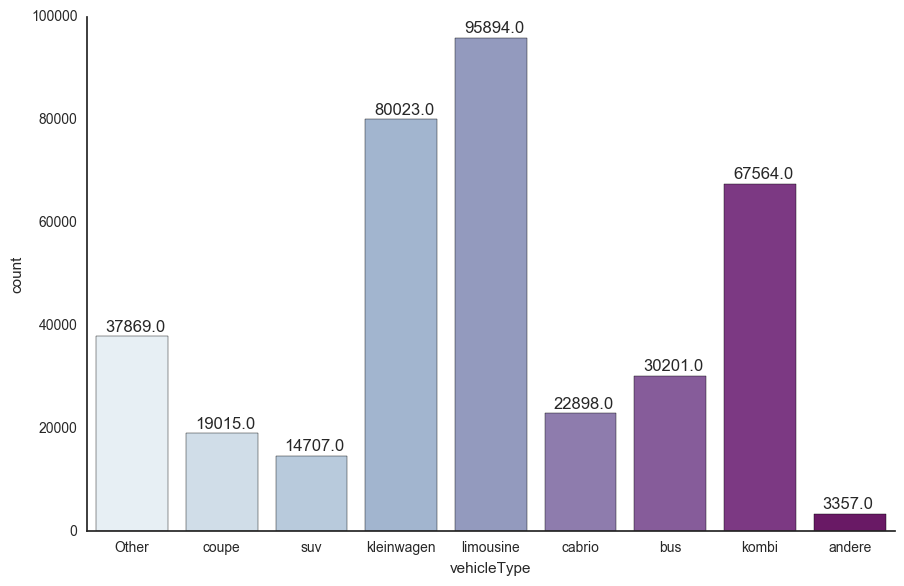

In [14]:
import numpy as np
import seaborn as sns
sns.set(style="white")

# Draw a count plot to show the number of vehicles belonging to each vehicleType
g = sns.factorplot(x="vehicleType", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1000))

In [15]:
# checking if there are any null values in the column brand
df["brand"].isnull().value_counts()

False    371528
Name: brand, dtype: int64

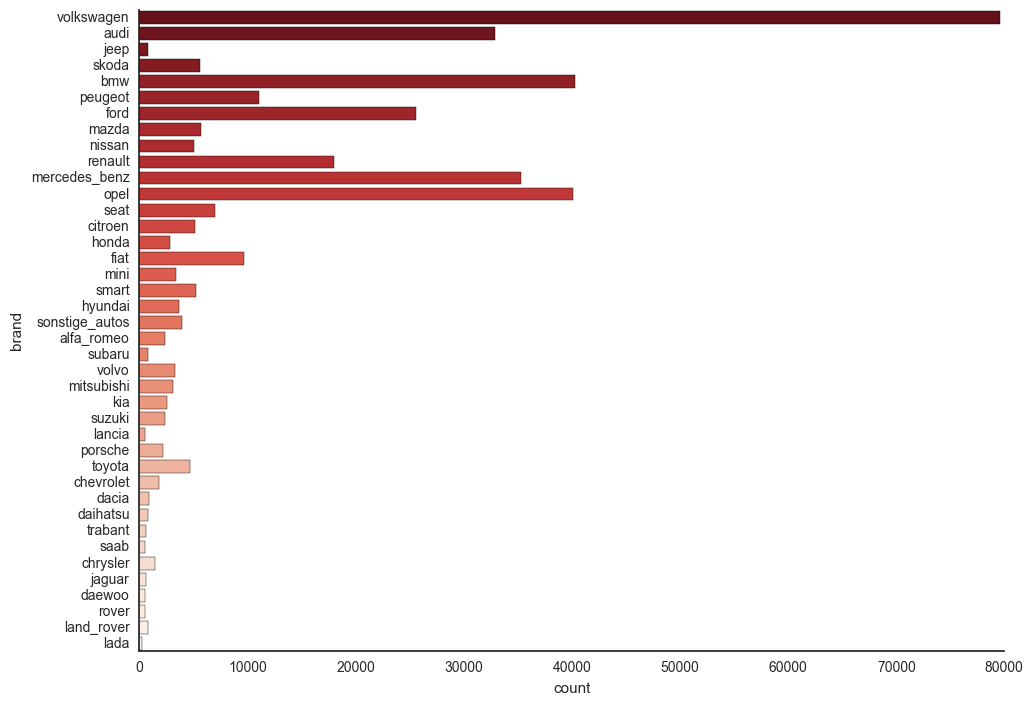

In [16]:
# Draw a count plot to show the number of vehicles belonging to each brand
g = sns.factorplot(y="brand", data=df, kind="count",
                   palette="Reds_r", size=7, aspect=1.5)
#g.set_xticklabels(step=2)
# for p in g.ax.patches:
#     g.ax.annotate((p.get_width()), (p.get_width()+0.1, p.get_y()))

In [17]:
# the actual count of vehicles belonging to each brand
df["brand"].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [18]:
# checking if there are any null values in the column seller
df["seller"].isnull().value_counts()

# checking the different types of values in the column seller
df["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [19]:
# checking if there are any null values in the offerType 
df["offerType"].isnull().value_counts()

# checking the different types of values in the column offerType
df["offerType"].value_counts()

# changing values of offerType Gesuch to Request and Angebot to Offer
df["offerType"] = df["offerType"].map({'Gesuch':"Request",'Angebot':'Offer'})

In [20]:
# checking if there are any null values in the yearOfRegistration
df["yearOfRegistration"].isnull().value_counts()

# checking the different types of values in the column offerType
df["yearOfRegistration"].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10886
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
        ...  
5900        1
2066        1
6500        1
9229        1
8500        1
8200        1
2290        1
3700        1
1200        1
9450        1
1001        1
1255        1
1253        1
5600        1
3800        1
4800        1
7100        1
5300        1
3500        1
1911        1
2200        1
1688        1
1925        1
3200        1
1920        1
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, dtype: int64

/Users/aj/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


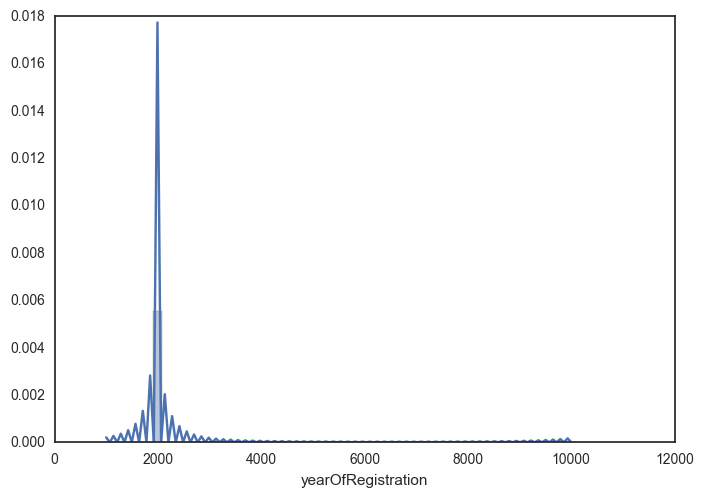

In [21]:
# Distribution of vehicles based on year of registration
g = sns.distplot(df["yearOfRegistration"])

In [32]:
# No of vehicles that are registered before 1890 - boolean
(df["yearOfRegistration"] < 1890).value_counts()

# No of vehicles that are registered after 2016 - boolean
(df["yearOfRegistration"] > 2016).value_counts()

# No of vehicles that are registered after 2016 - actual values
df[df["yearOfRegistration"] > 2016]["yearOfRegistration"].value_counts().count()

# No of vehicles that are registered before 1890 - actual values
df[df["yearOfRegistration"] < 1890]["yearOfRegistration"].value_counts().count()

False    356848
True      14680
Name: yearOfRegistration, dtype: int64

In [41]:
# dropping rows that are inconsistent with the dataset based on year of registration
temp = df[(df["yearOfRegistration"] >= 1890) & (df["yearOfRegistration"] <= 2016)]

In [79]:
# new dataset with valid year of registartion between 1890 to 2016
temp["yearOfRegistration"].value_counts().count()

97

In [87]:
#(temp["monthOfRegistration"] == 1).value_counts()

/Users/aj/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


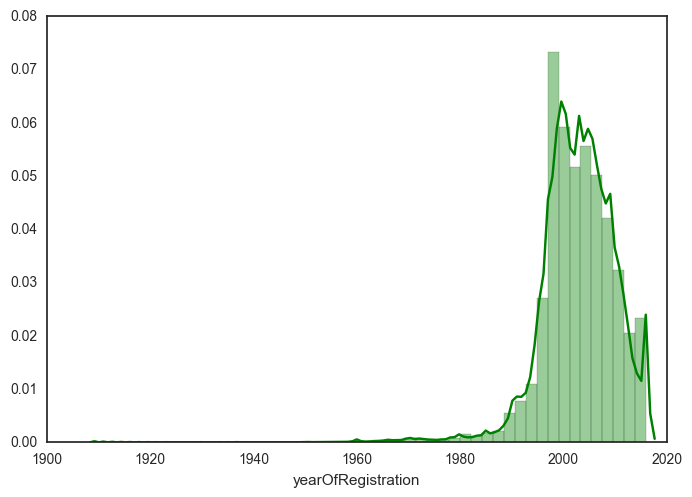

In [836]:
# Histogram for a bucket of 20 years showing the total no of vehicles 
g = sns.distplot(temp["yearOfRegistration"], kde=True, color="Green")

In [838]:
t = temp.groupby("vehicleType")
t["price"].median()
# g = sns.barplot(x="vehicleType", y="price", data=temp)

vehicleType
Other           750.0
andere         2294.5
bus            4500.0
cabrio         6400.0
coupe          5250.0
kleinwagen     1500.0
kombi          3400.0
limousine      3200.0
suv           10500.0
Name: price, dtype: float64

In [837]:
t["price"].quantile(0.75)

4650.0

In [165]:
t = temp[temp["vehicleType"] == "kleinwagen"]
(t["price"].quantile(0.75) - t["price"].quantile(0.25))*1.5 + 750

5025.0

In [157]:
t = t[t["price"] <= 6885]
t.head(5)

6900

In [166]:
t = temp[((temp["vehicleType"] == "andere") & (temp["price"] <= 6885)) |
        ((temp["vehicleType"] == "Other") & (temp["price"] <= 3708)) |
        ((temp["vehicleType"] == "suv") & (temp["price"] <= 19050)) |
        ((temp["vehicleType"] == "kombi") & (temp["price"] <= 10427)) |
        ((temp["vehicleType"] == "bus") & (temp["price"] <= 10198)) |
        ((temp["vehicleType"] == "cabrio") & (temp["price"] <= 15750)) |
        ((temp["vehicleType"] == "limousine") & (temp["price"] <= 10351)) |
        ((temp["vehicleType"] == "coupe") & (temp["price"] <= 19800)) |
        ((temp["vehicleType"] == "kleinwagen") & (temp["price"] <= 5025))]
t.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [176]:
t[t["vehicleType"] == "suv"]["price"].mean()

8720.235273972603

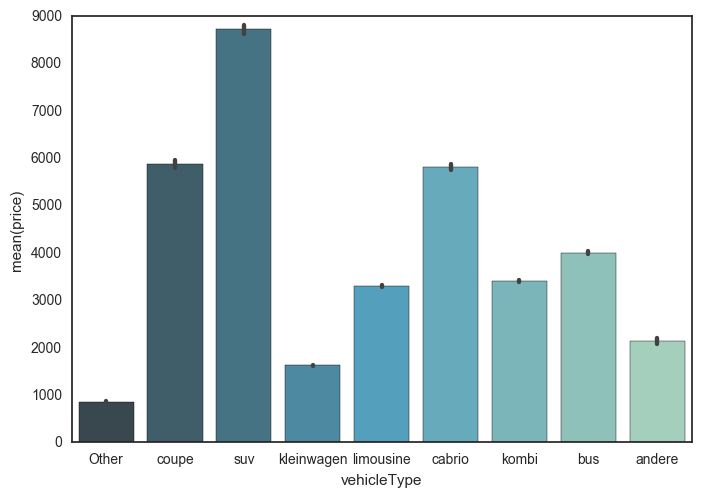

In [197]:
g = sns.barplot(x="vehicleType", y="price",palette="GnBu_d", data=t)
# g = sns.distplot(t["price"], kde=False, color="Green")

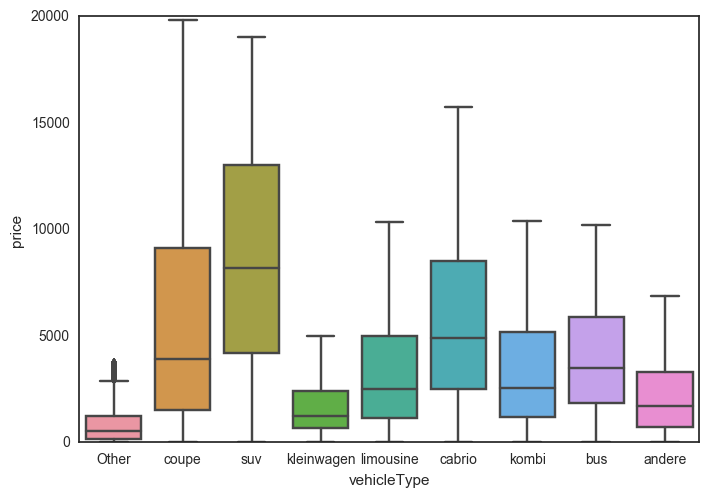

In [399]:
# Boxplot to see the distribution after outliers has been removed
g = sns.boxplot(x="vehicleType", y="price", data=t)

# stripplot to see the spread of prices in each vehicleType
# g = sns.stripplot(x="vehicleType", y="price", data=t, marker="D",size=15, alpha=0.2, jitter=True)

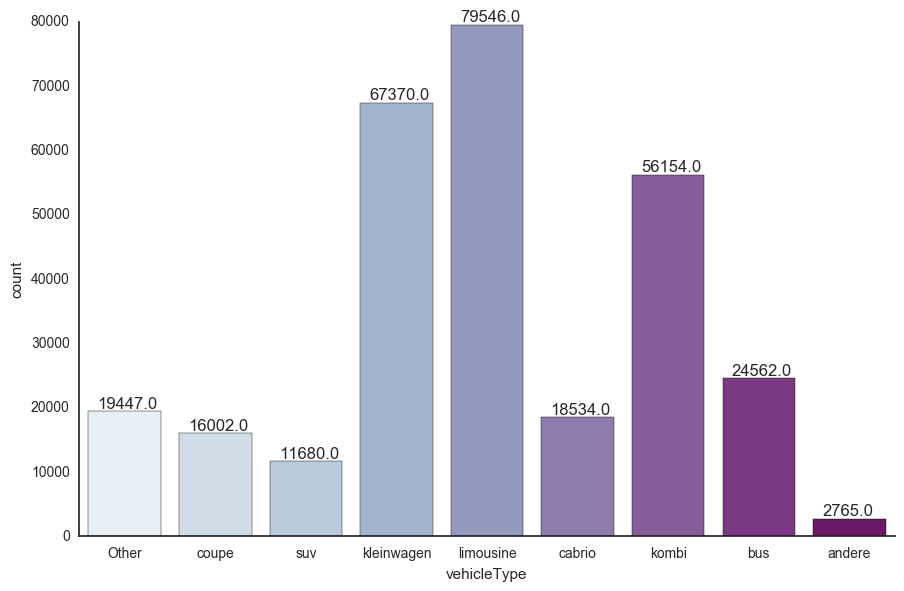

In [186]:
# Count plot to show the number of vehicles belonging to each vehicleType
g = sns.factorplot(x="vehicleType", data=t, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [205]:
# setting the NaN gearbox types to Unspecified
 t["gearbox"].fillna("Unspecified", inplace=True)

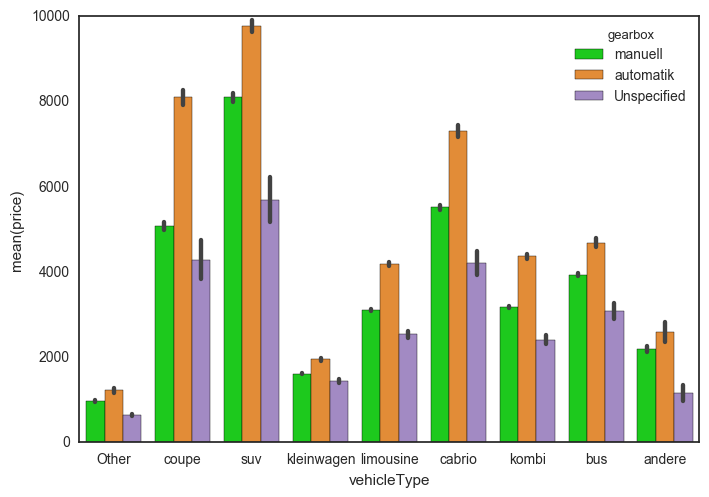

In [227]:
# g = sns.barplot(x=t["vehicleType"], y=t["price"],color = "#3498db")
colors = ["#00e600", "#ff8c1a","#a180cc"]
g = sns.barplot(x=t["vehicleType"], y=t["price"],hue=t["gearbox"], palette=colors)
#sns.barplot(x=t["vehicleType"], y=t[t["gearbox"] == "manuell"]["price"],color="#e74c3c")
#g = sns.barplot(x=t["vehicleType"], y=t[t["gearbox"] == "automatik"]["price"],color="#9b59b6")

In [236]:
t["fuelType"].unique()

array(['Gasoline', 'Diesel', 'Other', 'Lpg', 'Hybrid', 'Cng', 'Electric'], dtype=object)

In [233]:
# setting the NaN fuelType types to andere
t["fuelType"].fillna("andere",inplace=True)

/Users/aj/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [235]:
# Changing german names to english readable format
t["fuelType"] = t["fuelType"].map({'benzin':'Gasoline','diesel':'Diesel','andere':'Other','lpg':'Lpg','hybrid':'Hybrid','cng':'Cng','elektro':'Electric'})

/Users/aj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


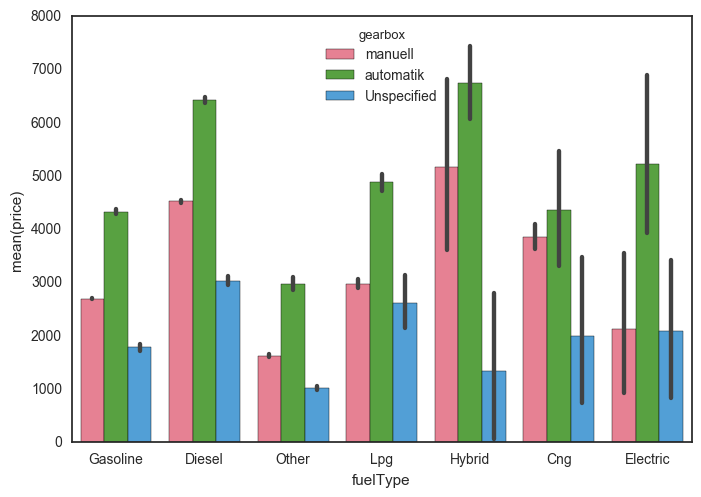

In [238]:
# barplot for price based on fuel type and gearbox type
colors = ["#00e600", "#ff8c1a","#a180cc"]
g = sns.barplot(x=t["fuelType"], y=t["price"],hue=t["gearbox"], palette="husl")

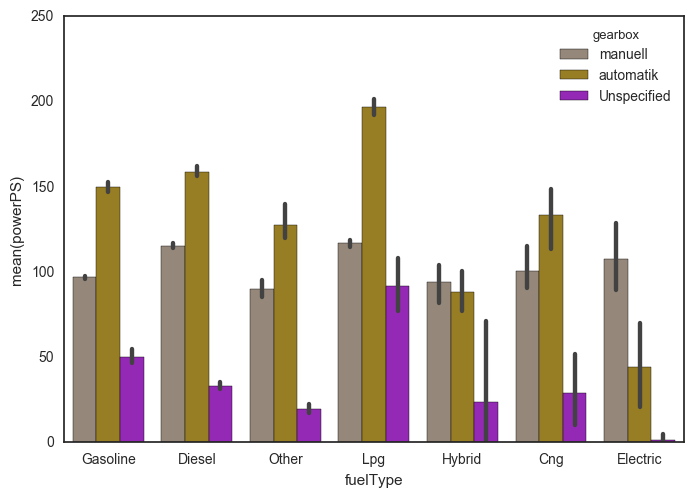

In [302]:
# barplot for price based on fuel type and gearbox type
colors = ["#998877", "#aa8811","#a112cc"]
g = sns.barplot(x=t["fuelType"], y=t["powerPS"],hue=t["gearbox"], palette=colors)

In [250]:
t[(t["fuelType"] == "Hybrid") & (t["gearbox"] == "automatik")]["price"].quantile(0.75)

7950.0

In [697]:
t.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,yearOfCreation,monthOfCreation,yearCrawled,monthCrawled
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016,March,2016,March
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,2016,March,2016,March
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,2016,March,2016,March


In [270]:
from datetime import datetime
d = datetime.strptime('2007-07-18 10:03:19', '%Y-%m-%d %H:%M:%S')
day_string = d.strftime('%Y-%m-%d')
time_string = d.strftime('%H:%M:%S')

In [273]:
time_string

'10:03:19'

In [693]:
# splitting dateCreated by year
# t["yearOfCreation"] = t['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

# splitting dateCrawled by year
t["yearCrawled"] = t['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%Y'))

/Users/aj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [694]:
# splitting dateCreated by month
# t["monthOfCreation"] = t['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

# splitting dateCrawled by month
t["monthCrawled"] = t['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

/Users/aj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [781]:
# no of days seen online
from_date = t['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
to_date = t['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())
no_days = abs((to_date-from_date))
no_days = (no_days / np.timedelta64(1, 'D')).astype(int)
t["NoOfDaysOnline"] = no_days

/Users/aj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [783]:
# date_format = "%m/%d/%Y"
# a = datetime.strptime(date1, date_format)
# b = datetime.strptime(date2, date_format)
# delta = b - a
# print(delta.days)

# no of hrs seen online
hrs_from = t['dateCreated'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
hrs_to = t['lastSeen'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().strftime('%H'))
# date1 = t["lastSeen"].apply(lambda x: pd.Timestamp(x))
# date2 = t["dateCrawled"].apply(lambda x: pd.Timestamp(x))
# (date1-date2).astype('timedelta64[h]')
total_hrs = (hrs_to.astype(int) - hrs_from.astype(int))
t["NoOfHrsOnline"] = total_hrs

/Users/aj/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [798]:
 yr = t['dateCrawled'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().strftime('%B'))

In [801]:
t.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,dateCreated,nrOfPictures,postalCode,lastSeen,yearOfCreation,monthOfCreation,yearCrawled,monthCrawled,NoOfDaysOnline,NoOfHrsOnline
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016,March,2016,March,14,3
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,2016,March,2016,March,14,1


In [829]:
# deleting the column noOfPictures since all of them are Zero
# del t["nrOfPictures"]

t[(t["yearOfCreation"] == "2016") & (t["monthOfCreation"] == "May")]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,dateCreated,nrOfPictures,postalCode,lastSeen,yearOfCreation,monthOfCreation,yearCrawled,monthCrawled,NoOfDaysOnline,NoOfHrsOnline


In [297]:
t[t["vehicleType"] == "coupe"]["powerPS"].median()

147.0

In [320]:
trial = pd.DataFrame()

In [318]:
# trial = trial.append(pd.DataFrame({'name':['ajay','naveen']}))

In [381]:
t["price"].isnull().value_counts()

False    296060
Name: price, dtype: int64

In [307]:
# trial = pd.DataFrame({'vehicleType':list(t["vehicleType"].unique()),'brand':list(t["brand"].unique())})

In [373]:
dic = {}
#list(t["vehicleType"].unique())
# list(t["brand"].unique())
for b in list(t["brand"].unique()):
    for v in list(t["vehicleType"].unique()):
        z = t[(t["brand"] == b) & (t["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))

In [387]:
t[(t["brand"] == "volvo") & (t["vehicleType"] == "bus")]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [361]:
# dic = {}

In [371]:
# dic['name']=[]
# dic['name'].append('ganesh')

In [375]:
# resetting the indexes
trial = trial.reset_index()

In [439]:
# del trial["index"]
# trial["avgPrice"].fillna(0,inplace=True)
# trial["avgPrice"].isnull().value_counts()
# trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,avgPrice,brand,vehicleType
0,897,volkswagen,Other
1,7433,volkswagen,coupe
2,11420,volkswagen,suv
3,1554,volkswagen,kleinwagen
4,3351,volkswagen,limousine


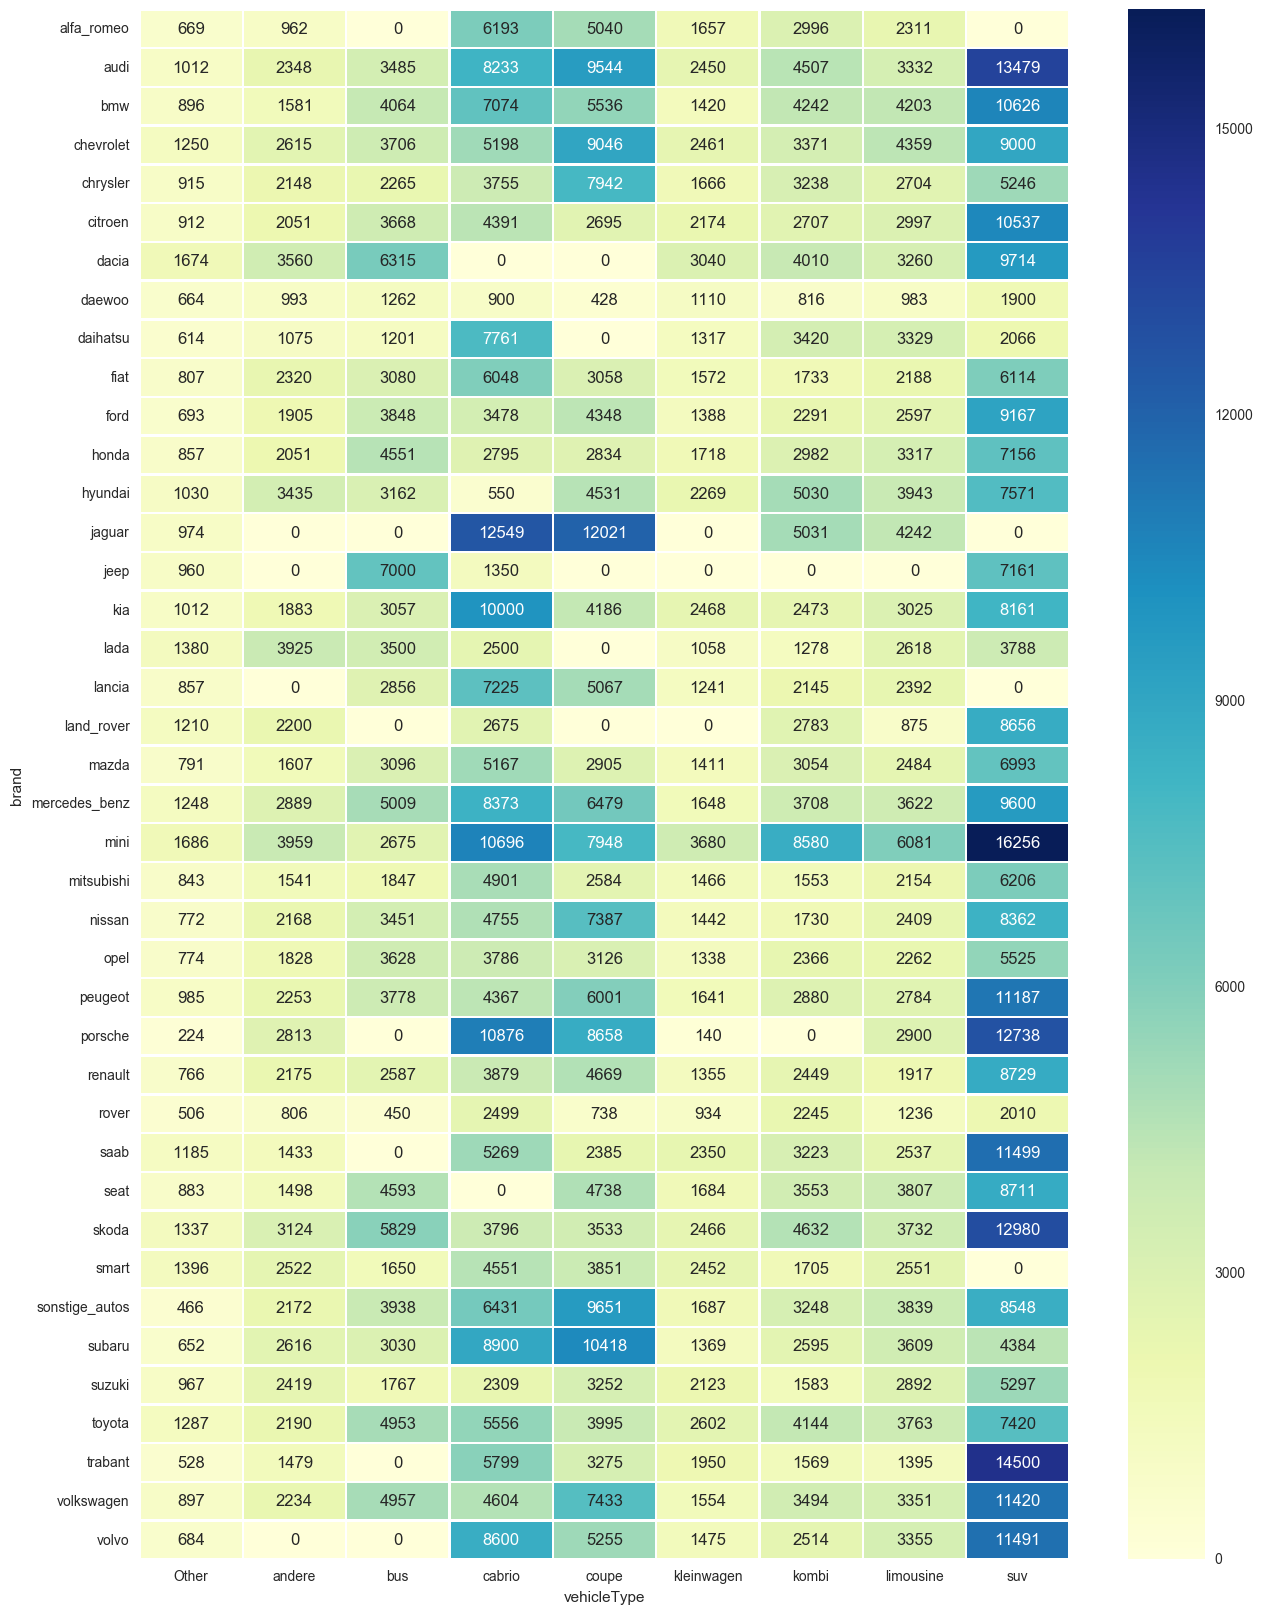

In [519]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
g = sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
fig.savefig("/Users/aj/Desktop/Image.png")

In [472]:
t[(t["brand"] == "volvo") & (t["vehicleType"] == "bus")]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [481]:
t["dateCrawled"].isnull().value_counts()

False    296060
Name: dateCrawled, dtype: int64

In [574]:
# script for making a CreateFolder.sh file to create directory structure
fileName = "/Users/aj/Desktop/CreateFolder.sh"
file = open(fileName, "w+")
baseString = "mkdir -p /Users/aj/Desktop/Structure/"
for b in list(t["brand"].unique()):
    for y in list(t[t["brand"] == b]["yearOfRegistration"].unique()):
        newString = baseString + b + "/" + str(y) + "\n"
        file.write(newString)
file.close()


In [518]:
# for b in list(t["brand"].unique()):
#     for y in list(t[t["brand"] == b]["yearOfRegistration"].unique()):
#         print(b + str(y))

In [563]:
# saving the data file as csv to desired location
t.to_csv("/Users/aj/Desktop/test_used_cars.csv",index=False)

In [566]:
check = pd.read_csv("/Users/aj/Desktop/output.csv")
check.shape

(22715, 20)

In [596]:
t[(t["brand"] == "daewoo") & (t["vehicleType"] == "suv")]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
15729,2016-03-30 13:38:52,DIESEL_MERCEDES_Motor_Korando_Daewoo/Ssangyong,privat,Offer,1900,test,suv,1999,manuell,98,andere,125000,5,Diesel,daewoo,ja,2016-03-30 00:00:00,0,23843,2016-04-07 04:15:33


In [575]:
# creating folder structure as per brand of vehicle
fileName = "/Users/aj/Desktop/CreateFolder.sh"
file = open(fileName, "w+")
baseString = "mkdir -p /Users/aj/Desktop/Structure/"
for b in list(t["brand"].unique()):
    newString = baseString + b + "\n"
    file.write(newString)
file.close()

In [595]:
# splitting the the records based on brand and vehicleType
fileName = "/Users/aj/Desktop/CreateFiles.sh"
file = open(fileName, "w+")
baseString_before = '''awk 'BEGIN{FS=OFS=","} FNR == 1 {print} '''
baseString_after = ''' {print}' /Users/aj/Desktop/test_used_cars.csv >> /Users/aj/Desktop/Structure/'''
for b in list(t["brand"].unique()):
    for typ in list(t[t["brand"] == "audi"]["vehicleType"].unique()):
        newString = baseString_before + '$15 == ' + '"' + b + '"' + ' && $7 == ' + '"' + typ + '"' + baseString_after + b + "/" + b + "_" + typ + ".csv" + "\n"
        file.write(newString)
file.close()


In [768]:
import subprocess
import os
import stat
fileName = "/Users/aj/Desktop/Create_Shell_Another.sh"
file = open(fileName, "w+")
shell_string = "mkdir -p /Users/aj/Desktop/Practice_Shell"
file.write(shell_string)
file.close()
st = os.stat('/Users/aj/Desktop/Create_Shell_Another.sh')
os.chmod('/Users/aj/Desktop/Create_Shell_Another.sh', st.st_mode | stat.S_IEXEC)
subprocess.call('/Users/aj/Desktop/Create_Shell_Another.sh',shell=True)

0

In [600]:
# concatinating files belonging to the same brand 
import glob 
path =r'/Users/aj/Desktop/Structure/audi' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)
# sample_csv = pd.read_csv("/Users/aj/Desktop/Structure/audi/*.csv")

In [668]:
# analysis for a particular brand of car and vehicleType
brand_name = "audi"
vehcile_type = "coupe"
file_path = "/Users/aj/Desktop/Structure/" + brand_name +"/" + brand_name +"_" + vehcile_type + ".csv"
frame_brand_type = pd.read_csv(file_path)

In [669]:
frame_brand_type.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,NaN,125000,5,Diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
1,2016-04-02 12:54:14,Audi_TT_Coupe_1.8_T_quattro,privat,Offer,3399,test,coupe,1999,manuell,224,tt,150000,9,Gasoline,audi,ja,2016-04-02 00:00:00,0,61276,2016-04-05 19:44:33
2,2016-03-29 23:38:02,Audi_80_coupe_top_gepflegt_2_0,privat,Offer,1500,control,coupe,1994,manuell,116,NaN,150000,8,Other,audi,nein,2016-03-29 00:00:00,0,32791,2016-04-06 20:16:34


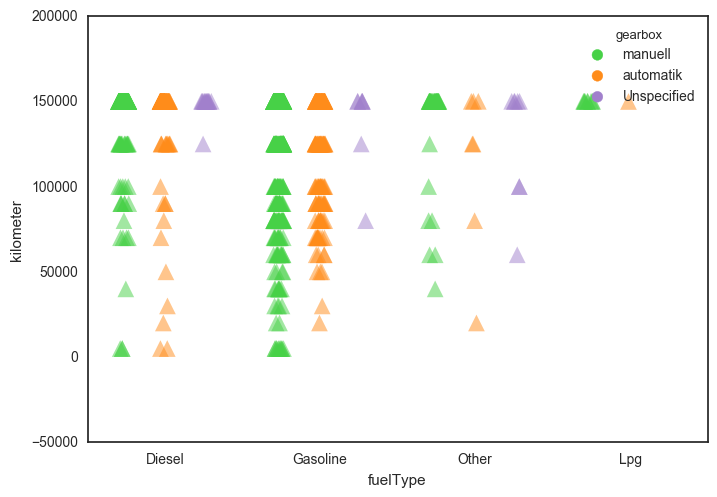

In [685]:
colors = ["#47d147", "#ff8c1a","#a180cc"]
g = sns.stripplot(x="fuelType", y="kilometer", hue="gearbox",split=True,data=frame_brand_type, marker="^",size=12, alpha=0.5,palette=colors, jitter=True)
# g = sns.swarmplot(x="fuelType", y="price", hue="gearbox", data=frame_brand_type)